Creating training data batches...
Creating validation data batches...
TF version: 2.1.0
TF Hub version: 0.8.0
GPU not available
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Train for 13 steps, validate for 4 steps
Epoch 1/100
13/13 [==============================] - 128s 10s/step - loss: 4.7565 - accuracy: 0.0625 - val_loss: 3.4003 - val_accuracy: 0.2200
Epoch 2/100
13/13 [==============================] - 104s 8s/step - loss: 2.2664 - accuracy: 0.5200 - val_loss: 1.9943 - val_accuracy: 0.5025
Epoch 3/100
13/13 [==============================] - 106s 8s/step - loss: 1.0448 - accuracy: 0.8131 - val_loss: 1.3633 - val_accuracy: 0.6300
Epoch 4/100
13/13 [==============================] - 95s 7s/step - loss: 0.5486 - accuracy: 0.9150 - val_loss: 1.1006 - val_accuracy: 0.6875
Epoch 5/100
13/13 [==============================] - 95s 7s/step - loss: 0.3322 - accuracy: 0.9663 - val_loss: 0.9914 - val_accuracy: 0.6975
Epoch 6/100
13/13 [==========

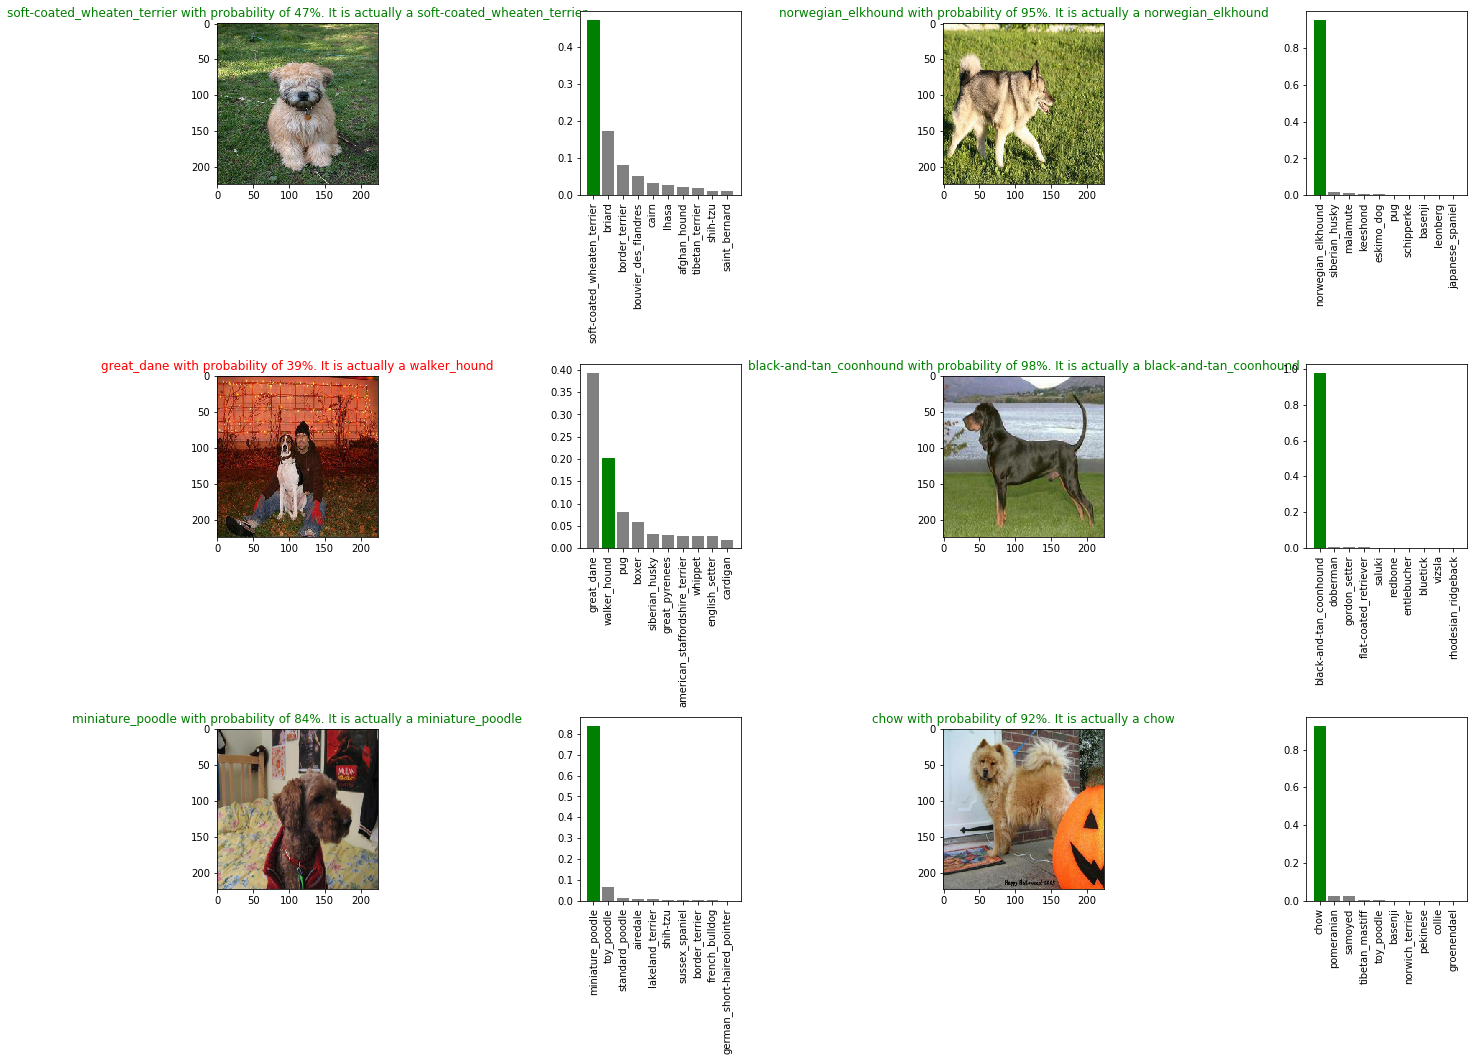

In [2]:
path = "D:/datasets/horse-or-human"
path = "D:/Google Drive/colab_data/dog_vision"

# start tensorboard with `tensorboard --logdir='{path}/logs' --port 2222`

from scripts.import_data import import_data
from scripts.preprocessing import preprocessing
from scripts.model import model
from scripts.predict import predict

i_d = import_data(path,2000)
i_d.import_raw_data()
i_d.get_raw_traindata()
X_train, X_val, y_train, y_val = i_d.X_train, i_d.X_val, i_d.y_train, i_d.y_val

p = preprocessing(i_d.unique_labels, BATCH_SIZE=128)
train_data = p.create_data_batches(X_train,y_train)
val_data = p.create_data_batches(X_val,y_val,valid_data=True)

m = model(i_d.unique_labels, path)
model = m.train_model(train_data, val_data)

pre = predict(model, val_data, i_d.unique_labels)
pre.check_predictions()